## Work
1. 試比較 save_best_only 與否的差異
2. 請僅存入將 save_weights_only 設定為 True, 並嘗試 reset ipynb 並將模型與權重重新建回並預測 x_test

In [20]:
import os
import keras
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(nurons = [512,256,128]):
    input_layer = keras.layers.Input([x_train.shape[-1]])
    for index,nuron in enumerate(nurons):
        if index == 0:
            x = keras.layers.Dense(units = nuron,activation = 'relu')(input_layer)
        else:
            x = keras.layers.Dense(units = nuron,activation = 'relu')(x)
        x = BatchNormalization()(x)
        
    output_layer = keras.layers.Dense(units = 10,activation = 'softmax')(x)
    model = keras.models.Model(inputs = [input_layer],outputs  = [output_layer])
    return model

In [6]:
"""Code Here
設定超參數
"""
learning_rate = 1e-3
batch_size = 1024
momentum = .95

In [55]:
# 載入 Callbacks
"""Code Here
設定 callbacks: model checkpoint
"""
checkpoint_best = keras.callbacks.ModelCheckpoint(filepath = 'temp_best.h5',
                                            monitor = 'val_loss',
                                            save_best_only = True,
                                            save_weights_only = True)
checkpoint = keras.callbacks.ModelCheckpoint(filepath = 'temp.h5',
                                            monitor = 'val_loss',
                                            save_best_only = False,
                                            save_weights_only = True)

checkpoints = [checkpoint_best,checkpoint]

In [56]:
results = {}
for index,check in enumerate(checkpoints):
    model = build_mlp()
    optimizer = keras.optimizers.SGD(lr = learning_rate,momentum = momentum,nesterov = True)
    model.compile(loss = 'categorical_crossentropy',metrics = ['accuracy'],optimizer = optimizer)
    model.fit(x_train,y_train,
             epochs = 50,
             batch_size = batch_size,
             validation_data = (x_test,y_test),
             shuffle = True,
             callbacks = [check])
    history = model.history.history
    index_name = lambda name : 'checkpoint_best' if index == 1 else 'checkpoint'
    results[index_name(index)] = {'val_loss':history['val_loss'],
                                 'loss':history['loss'],
                                 'val_accuracy':history['val_accuracy'],
                                 'accuracy':history['accuracy']}


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 72us/step - loss: 2.2079 - accuracy: 0.2722 - val_loss: 2.1401 - val_accuracy: 0.2071
Epoch 2/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.7406 - accuracy: 0.3983 - val_loss: 1.9794 - val_accuracy: 0.3002
Epoch 3/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.6157 - accuracy: 0.4396 - val_loss: 1.8186 - val_accuracy: 0.3746
Epoch 4/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.5445 - accuracy: 0.4629 - val_loss: 1.7084 - val_accuracy: 0.4009
Epoch 5/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.4920 - accuracy: 0.4819 - val_loss: 1.6313 - val_accuracy: 0.4337
Epoch 6/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.4471 - accuracy: 0.4969 - val_loss: 1.5744 - val_accuracy: 0.4512
Epoch 7/50
50000/50000 [==============================] - 4s 75us/st

Epoch 6/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.4395 - accuracy: 0.4943 - val_loss: 1.5876 - val_accuracy: 0.4409
Epoch 7/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.4019 - accuracy: 0.5110 - val_loss: 1.5432 - val_accuracy: 0.4541
Epoch 8/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.3666 - accuracy: 0.5232 - val_loss: 1.5171 - val_accuracy: 0.4634
Epoch 9/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.3348 - accuracy: 0.5336 - val_loss: 1.4956 - val_accuracy: 0.4693
Epoch 10/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.3054 - accuracy: 0.5439 - val_loss: 1.5041 - val_accuracy: 0.4641
Epoch 11/50
50000/50000 [==============================] - 3s 70us/step - loss: 1.2787 - accuracy: 0.5547 - val_loss: 1.4815 - val_accuracy: 0.4763
Epoch 12/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.2522 - accuracy: 0.5655 - val_loss

In [57]:
loaded_model = build_mlp()
loaded_model_best = build_mlp()
loaded_model.compile(loss = 'categorical_crossentropy',metrics = ['accuracy'],optimizer = optimizer)
loaded_model_best.compile(loss = 'categorical_crossentropy',metrics = ['accuracy'],optimizer = optimizer)
loaded_model.load_weights('temp.h5')
loaded_model_best.load_weights('temp_best.h5')

normal_loadback_loss,normal_loadback_acc = loaded_model.evaluate(x_test,y_test)
best_loadback_loss,best_loadback_acc = loaded_model_best.evaluate(x_test,y_test)

10000/10000 [==============================] - 2s 158us/step


In [58]:
loadback_model_result = [{'loss':normal_loadback_loss,
                         'accuracy':normal_loadback_acc}
                        ,{'loss':best_loadback_loss,
                         'accuracy':best_loadback_acc}]

In [59]:
def plot_img(results,loadback_results):
    fig,axes = plt.subplots(len(results.keys()),2)
    fig.set_size_inches(16,14)

    for row_index,name in enumerate(results):
        axes[row_index][0].plot(range(len(results[name]['val_loss'])),results[name]['val_loss'],'--',color = 'r')
        axes[row_index][0].plot(range(len(results[name]['loss'])),results[name]['loss'],'-',color = 'r')
        axes[row_index][1].plot(range(len(results[name]['val_accuracy'])),results[name]['val_accuracy'],'--',color = 'r')
        axes[row_index][1].plot(range(len(results[name]['accuracy'])),results[name]['accuracy'],'-',color = 'r')
        axes[row_index][0].set_title(name + ':loss')
        axes[row_index][1].set_title(name + ':accuracy')
        
        axes[row_index][0].hlines(loadback_results[row_index]['loss'],xmin = 0,xmax = 50,linestyle = '--',color = 'g')
        axes[row_index][1].hlines(loadback_results[row_index]['accuracy'],xmin = 0,xmax = 50,linestyle = '--',color = 'g')


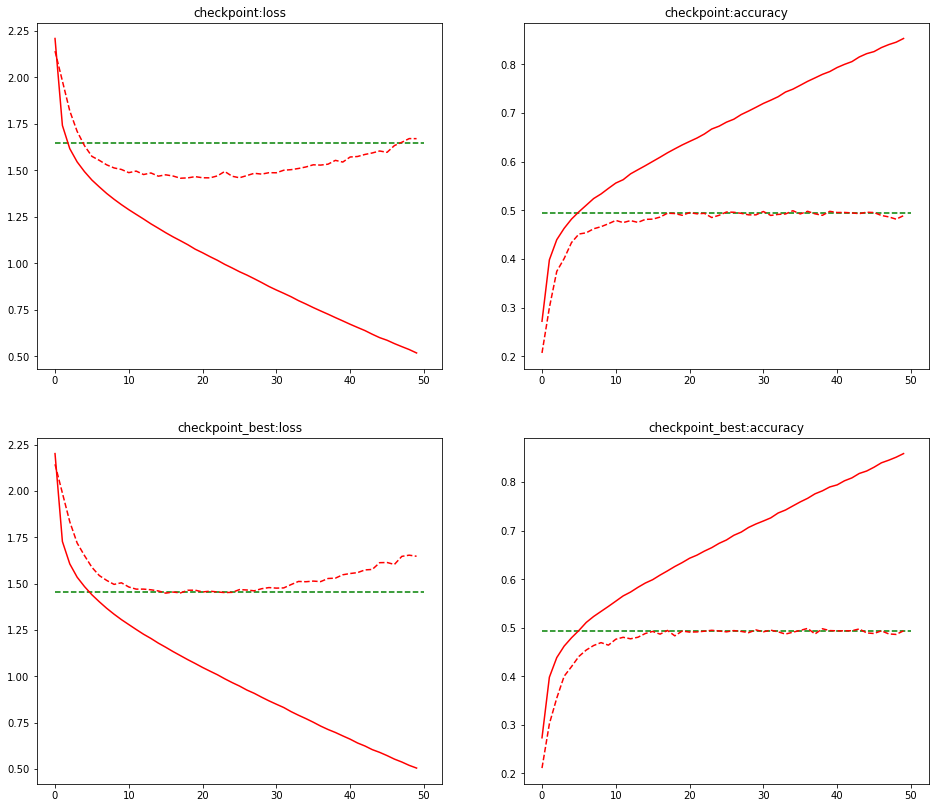

In [60]:
plot_img(results,loadback_model_result)

10000/10000 [==============================] - 1s 129us/step
